In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 34.8 MB/s 


In [3]:
# import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
import seaborn as sn
import tensorflow.keras as keras
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix


In [4]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense,BatchNormalization

import visualkeras

In [5]:

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")



11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# plt.imshow(x_train[2], cmap=plt.cm.binary)

In [7]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)


In [8]:
# plt.imshow(x_test[0], cmap='gray', interpolation='none')
# plt.title("Digit: {}".format(y_test[0]))

In [9]:
# fig = plt.figure()
# for i in range(9):
#     plt.subplot(3,3,i+1)
#     plt.tight_layout()
#     plt.imshow(x_train[i], cmap='gray', interpolation='none')
#     plt.title("Digit: {}".format(y_train[i]))
#     plt.xticks([])
#     plt.yticks([])

In [10]:
# fig = plt.figure()
# plt.subplot(2,1,1)
# plt.imshow(x_train[4], cmap='gray', interpolation='none')
# plt.title("Digit: {}".format(y_train[4]))
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,1,2)
# plt.hist(x_train[0].reshape(784))
# plt.title("Pixel Value Distribution")


In [11]:
from sklearn.model_selection import train_test_split
z_train, z_val, s_train, s_val = train_test_split(x_train, y_train, test_size=0.2)

In [13]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)



# Scale images to the [0, 1] range





In [14]:

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [17]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))


In [18]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
history_1 = model.fit(z_train,s_train,epochs=10 ,validation_data=(z_val, s_val))

Epoch 1/10
1500/1500 [==============================] - 14s 4ms/step - loss: 0.1865 - accuracy: 0.9447 - val_loss: 0.0747 - val_accuracy: 0.9774
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0566 - val_accuracy: 0.9822
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0523 - val_accuracy: 0.9838
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.0503 - val_accuracy: 0.9859
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0419 - val_accuracy

In [19]:
#evaluting the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.9868


[0.05408452823758125, 0.9868000149726868]

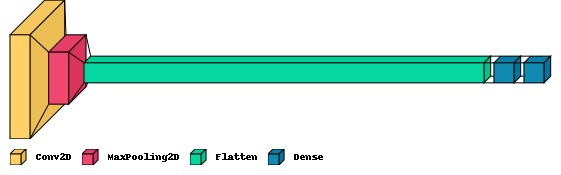

In [20]:
visualkeras.layered_view(model, legend=True,)

Model 1


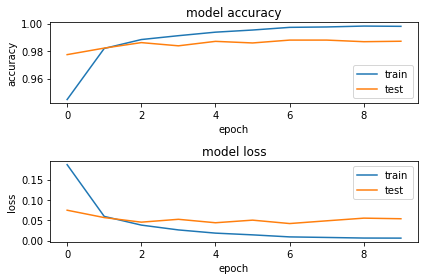

In [21]:
print("Model 1")
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [22]:
pred_model_1 = model.predict(x_test)
prediction_model_1 = np.argmax(pred_model_1,axis=1)

313/313 [==============================] - 1s 2ms/step


In [23]:
prediction_model_1

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
print("Classification report Model Batch Normalization")
print(classification_report(y_test, prediction_model_1))

Classification report Model Batch Normalization
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Model 1


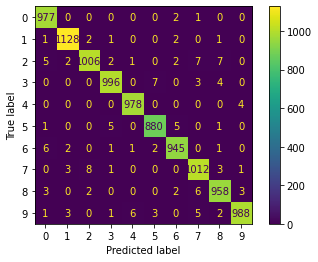

In [26]:
print("Model 1")
print(ConfusionMatrixDisplay.from_predictions(y_test, prediction_model_1))

In [27]:
models2=Sequential()
models2.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu"))
     
    # Max pooling will reduce the
    # size with a kernal size of 2x2
models2.add(MaxPooling2D(pool_size=(2, 2)))
models2.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))
     
models2.add(MaxPooling2D(pool_size=(2, 2)))
models2.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))
     
models2.add(MaxPooling2D(pool_size=(2, 2)))
     
    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
models2.add(Flatten())
models2.add(Dense(256, activation="relu"))
     
    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
models2.add(Dense(10, activation="softmax"))

In [28]:
#compiling the model
models2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
history_2 = models2.fit(z_train,s_train,epochs=10 ,validation_data=(z_val, s_val))

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1158 - accuracy: 0.9637 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0256 - val_accuracy: 0.9924
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0276 - val_accuracy: 0.9922
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0373 - val_ac

In [29]:
#evaluting the model
models2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9928


[0.03251255676150322, 0.9927999973297119]

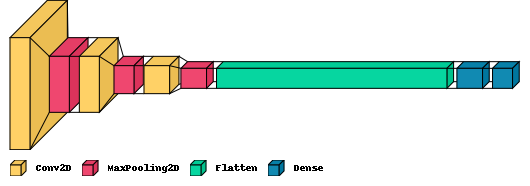

In [30]:
visualkeras.layered_view(models2, legend=True,)

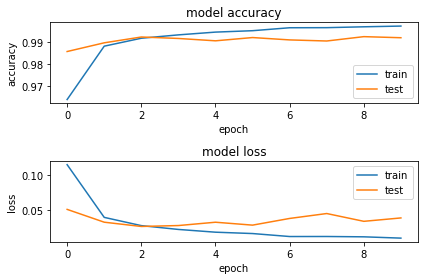

In [31]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [32]:
pred_models_2 = models2.predict(x_test)
prediction_models_2 = np.argmax(pred_models_2,axis=1)

313/313 [==============================] - 1s 2ms/step


In [33]:
print("Classification report Model Batch Normalization")
print(classification_report(y_test, prediction_models_2))

Classification report Model Batch Normalization
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Model 1


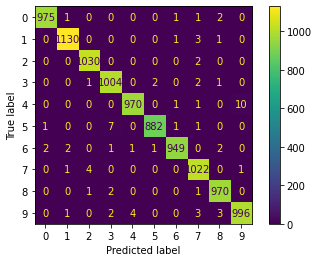

In [34]:
print("Model 1")
print(ConfusionMatrixDisplay.from_predictions(y_test, prediction_models_2))

## Modele final

In [35]:
models_final=Sequential()
models_final.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu"))
     
    # Max pooling will reduce the
    # size with a kernal size of 2x2
models_final.add(MaxPooling2D(pool_size=(2, 2)))
models_final.add(BatchNormalization())
models_final.add(Dropout(0.2))
models_final.add(Conv2D(120, (5, 5), padding="same",
                      activation="relu"))

models_final.add(MaxPooling2D(pool_size=(2, 2)))
models_final.add(BatchNormalization())
models_final.add(Dropout(0.2))
models_final.add(Conv2D(200, (5, 5), padding="same",
                      activation="relu"))
models_final.add(MaxPooling2D(pool_size=(2, 2)))
     
    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
models_final.add(BatchNormalization())
models_final.add(Dropout(0.2))
models_final.add(Flatten())
models_final.add(Dense(256, activation="relu"))
models_final.add(BatchNormalization())
models_final.add(Dropout(0.2))
    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
models_final.add(Dense(10, activation="softmax"))

In [36]:
es = keras.callbacks.EarlyStopping(
        monitor="val_loss", # metrics to monitor
        patience=6, # how many epochs before stop
        verbose=2,
        mode="min", # we need the maximum accuracy.
        restore_best_weights=False, # 
     )

In [37]:
#compiling the model
models_final.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_final = models_final.fit(z_train,s_train,epochs=10,callbacks=[es] ,validation_data=(z_val, s_val))

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.1188 - accuracy: 0.9635 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0549 - accuracy: 0.9830 - val_loss: 0.0441 - val_accuracy: 0.9857
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0533 - val_accuracy: 0.9845
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0331 - val_accuracy: 0.9893
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0378 - val_accuracy: 0.9891
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0436 - val_ac

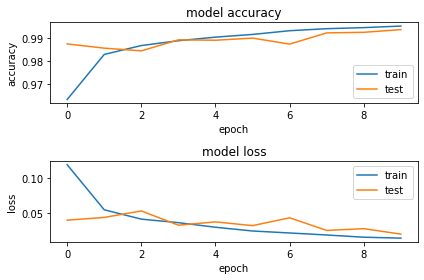

In [38]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [39]:
#evaluting the model
models_final.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0231 - accuracy: 0.9938


[0.023110492154955864, 0.9937999844551086]

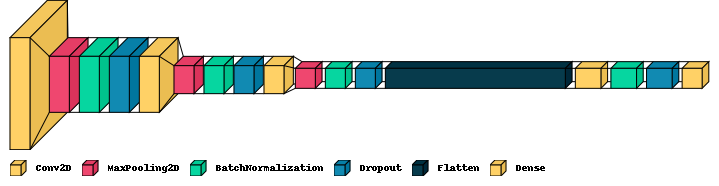

In [40]:
visualkeras.layered_view(models_final, legend=True,)

In [41]:
pred_models_final = models_final.predict(x_test)
prediction_models_final = np.argmax(pred_models_final,axis=1)

313/313 [==============================] - 1s 3ms/step


In [42]:
print("Classification report Model Batch Normalization")
print(classification_report(y_test, prediction_models_final))

Classification report Model Batch Normalization
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Model 1


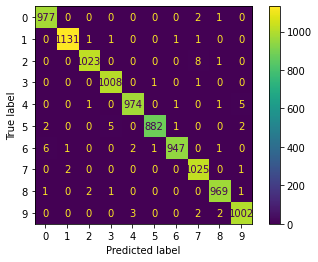

In [43]:
print("Model 1")
print(ConfusionMatrixDisplay.from_predictions(y_test, prediction_models_final))

In [ ]:
models_final.save("/content/drive/MyDrive/NLP-LSTM-Acc 99.9%/model_save/Model_mnist.h5")